In [1]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from bokeh.palettes import inferno
from lolimot import LolimotRegression

# Local Linear Model (LLM)
## Approximation einer eindimensionalen statischen Nichtlinearität mit Hilfe des LOLIMOT (LOcal LInear MOdel Tree) Algorithmus

### $\mathcal{NL}(u) = 3 \arctan(2u) + 5$

vlg. Schröder, Dierk und Buss, Martin: *Intelligente Verfahren: Identifikation und Regelung nichtlinearer Systeme*. S. 60ff, 2017

In [2]:
def nl(u):
    # zu lernende Nichtlinearität
    return 3 * np.arctan(2*u) + 5

def gerade(a,b,x):
    return a * x + b

k = 20
x = np.reshape(np.linspace(-5, 5, k), (k, 1))

lolimot = LolimotRegression(sigma=0.5,
                            smoothing='proportional',
                            p=1/3,
                            model_complexity=10,
                            x_range=[(-5.0, 5.0)])

lolimot.fit(X=x,
            y=nl(x))

[INFO] Finished model training after 0.7306 seconds.


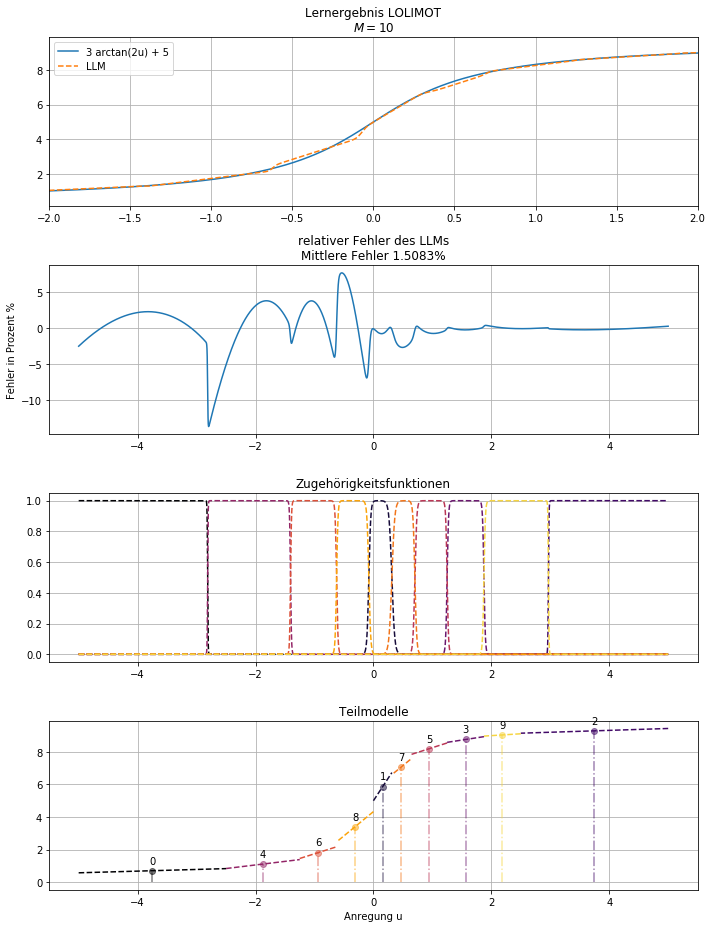

In [3]:
u = np.reshape(np.linspace(-5, 5, 5000), (5000, 1))
y_pred = lolimot.predict(u)

colors = inferno(lolimot.M + 1)
fig = plt.figure(figsize=(10, 13))

plt.subplot(4,1,1)
plt.title(f"Lernergebnis LOLIMOT\n$M = {lolimot.M}$")
plt.grid(True)
plt.plot(u, nl(u), label=f"3 arctan(2u) + 5")
plt.plot(u, y_pred, '--', label="LLM")
plt.xlim((-2, 2))
plt.legend()

plt.subplot(4,1,2)
plt.title(f"relativer Fehler des LLMs\nMittlere Fehler {np.abs(100*((y_pred/nl(u)) - 1)).mean():.4f}%")
plt.ylabel("Fehler in Prozent %")
plt.grid(True)
plt.plot(u, 100*((y_pred/nl(u)) - 1))
#plt.legend()

plt.subplot(4,1,3)
plt.title("Zugehörigkeitsfunktionen")
plt.grid(True)
for idx, column in enumerate(lolimot.A):
    plt.plot(u, column, '--', label=f"{idx}", color=colors[idx])
#plt.legend()

plt.subplot(4,1,4)
plt.title("Teilmodelle")
plt.grid(True)
plt.xlabel("Anregung u")
for idx, (x, y, c) in enumerate(lolimot.local_model_gen()):
    plt.plot(x, y, '--', color=colors[idx])
    markerline, stemlines, _ = plt.stem(lolimot.Xi[:, idx], c, linefmt='-.')
    plt.setp(stemlines, color=colors[idx], alpha=0.5)
    plt.setp(markerline, color=colors[idx], alpha=0.5)
    plt.annotate(f"{idx}", xy=(lolimot.Xi[:, idx], c), xytext=(-3,7), textcoords='offset points')
    
#plt.legend()  
    
plt.tight_layout()
plt.show()